<a href="https://colab.research.google.com/github/minhyeok2487/Algorithm/blob/main/%ED%8A%B8%EB%A6%AC(Tree)/%EC%B5%9C%EC%86%8C%EC%8B%A0%EC%9E%A5%ED%8A%B8%EB%A6%AC_%ED%81%AC%EB%A3%A8%EC%8A%A4%EC%B9%BC%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98(Kruskal's_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최소 신장 트리

## 1. 신장트리(Spanning Tree)란?

<img src="https://www.fun-coding.org/00_Images/spanningtree.png">

- 그래프 내에 있는 모든 정점을 연결하고 사이클이 없는 그래프
- 신장 트리의 조건
  - 본래의 그래프의 모든 노드를 포함해야 함
  - 모든 노드가 서로 연결
  - 트리의 속성을 만족시킴 (사이클이 존재하지 않음)

## 2. 최소 신장 트리(Minimum Spanning Tree, MST)

<img src="https://www.fun-coding.org/00_Images/mst.png" width=600>

- 가능한 Spanning Tree 중에서, 간선의 가중치 합이 최소인 Spanning Tree
- 가중치는 거리, 비용, 시간 등 여러가지로 응용할 수 있다.

## 3. MST 알고리즘

- 대표적인 최소 신장 트리(MST) 알고리즘
 - 크루스칼 알고리즘 (Kruskal's Algorithm)
 - 프림 알고리즘 (Prim's Algorithm) 

# 크루스칼 알고리즘 (Kruskal's Algorithm)

## 1. 알고리즘 이해

- 탐욕알고리즘 기반
 - 모든 정점을 독립적인 집합으로 만든다.
 - 모든 간성을 비용을 기준으로 정렬하고, 비용이 작은 간선부터 양 끝의 두 정점을 비교한다.
 - 두 정점의 최상위 정점을 확인하고, 서로 다를 경우 두 정점을 연결한다.(사이클 방지)

<img src="https://www.fun-coding.org/00_Images/kruscal_internal1.png" width=650>

<img src="https://www.fun-coding.org/00_Images/kruscal_internal2.png" width=800>

## 2.크루스칼 알고리즘 (Kruskal's algorithm) 코드 작성

In [ ]:
# 중복도 포함하면서 vertices와 edges를 담은 Dictionary 생성
mygraph = {
    'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'edges': [
        (7, 'A', 'B'),
        (5, 'A', 'D'),
        (7, 'B', 'A'),
        (8, 'B', 'C'),
        (9, 'B', 'D'),
        (7, 'B', 'E'),
        (8, 'C', 'B'),
        (5, 'C', 'E'),
        (5, 'D', 'A'),
        (9, 'D', 'B'),
        (7, 'D', 'E'),
        (6, 'D', 'F'),
        (7, 'E', 'B'),
        (5, 'E', 'C'),
        (7, 'E', 'D'),
        (8, 'E', 'F'),
        (9, 'E', 'G'),
        (6, 'F', 'D'),
        (8, 'F', 'E'),
        (11, 'F', 'G'),
        (9, 'G', 'E'),
        (11, 'G', 'F')
    ]
}

# 부모와 랭크를 저장하는 Dictionary 생성
parent = dict()
rank = dict()

### 알고리즘 연습

In [ ]:
# 1. 초기화
for node in mygraph['vertices']:
    parent[node] = node
    rank[node] = 0

print(parent)
print(rank)

In [ ]:
# 2. 간선 weight 기반 sorting
edges = mygraph['edges']
edges.sort()
print(edges)

In [ ]:
# 3. 사이클 없이 간선 연결
def findParent(node):
    if parent[node] != node:
        parent[node] = findParent(parent[node])
    return parent[node]

def union(node_v, node_u):
    root1 = findParent(node_v)
    root2 = findParent(node_u)
    
    if rank[root1] > rank[root2]:
        parent[root2] = root1
    else:
        parent[root1] = root2
        if rank[root1] == rank[root2]:
            rank[root2] += 1

mst = list()
for edge in edges:
    weight, node_v, node_u = edge
    if findParent(node_v) != findParent(node_u):
        union(node_v, node_u)
        mst.append(edge)
print(mst)
print(rank)

### 전체 코드 함수화

In [ ]:
# 1. 초기화 함수
def set(graph):
    for node in graph['vertices']:
        parent[node] = node
        rank[node] = 0

# 2. 간선 weight 기반 sorting 함수
def weigh_sort(graph):
    edges = graph['edges']
    edges.sort()
    return edges

# 3-1. 루트 노드 발견 함수
def findParent(node):
    if parent[node] != node:
        parent[node] = findParent(parent[node])
    return parent[node]

# 3-2. 트리 랭크 비교
def union(node_v, node_u):
    root1 = findParent(node_v)
    root2 = findParent(node_u)
    
    if rank[root1] > rank[root2]:
        parent[root2] = root1
    else:
        parent[root1] = root2
        if rank[root1] == rank[root2]:
            rank[root2] += 1

# 3-3. 사이클 없이 간선 연결 함수
def union_rank(graph):
    mst = list()
    for edge in graph['edges']:
        weight, node_v, node_u = edge
        if findParent(node_v) != findParent(node_u):
            union(node_v, node_u)
            mst.append(edge)
    return mst

# 메인 함수
def kruskal(graph):
    # 1. 초기화
    set(graph)

    # 2. 간선 weight 기반 sorting 
    weigh_sort(graph)

    # 3. 사이클 없이 간선 연결
    mst = union_rank(graph)

    return mst

In [ ]:
kruskal(mygraph)

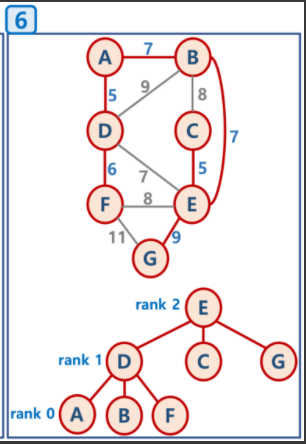

## 3.시간복잡도

- 크루스컬 알고리즘의 시간 복잡도는 O(E log E)
  - 다음 단계에서 2번, 간선을 비용 기준으로 정렬하는 시간에 좌우됨 (즉 간선을 비용 기준으로 정렬하는 시간이 가장 큼)
  1. 모든 정점을 독립적인 집합으로 만든다.
  2. 모든 간선을 비용을 기준으로 정렬하고, 비용이 작은 간선부터 양 끝의 두 정점을 비교한다.
     - 퀵소트를 사용한다면 시간 복잡도는 O(n log n) 이며, 간선이 n 이므로 O(E log E)
  3. 두 정점의 최상위 정점을 확인하고, 서로 다를 경우 두 정점을 연결한다. (최소 신장 트리는 사이클이 없으므로, 사이클이 생기지 않도록 하는 것임)
     - union-by-rank 와 path compression 기법 사용시 시간 복잡도가 결국 상수값에 가까움, O(1)

<img src="https://www.fun-coding.org/00_Images/kruscal_time.png">